## Clustering with K-Means

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1])

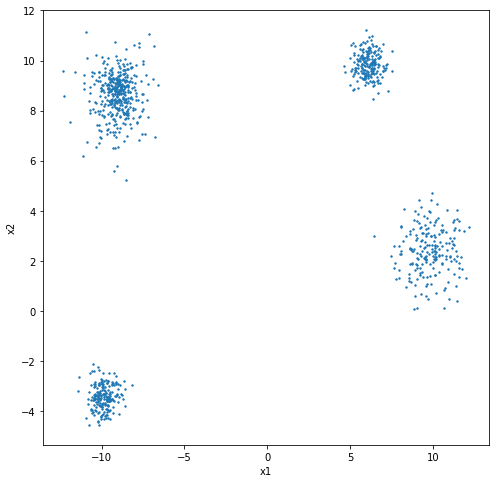

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [5]:
y_pred is kmeans.labels_

True

In [6]:
# 5 centroids found
kmeans.cluster_centers_

array([[ 6.06427048,  9.83713631],
       [-9.01522744,  9.17168468],
       [-9.88152557, -3.42136845],
       [ 9.77658481,  2.40256916],
       [-9.14887339,  7.7830078 ]])

In [7]:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [8]:
kmeans.predict(X_new)

array([3, 3, 4, 4])

In [9]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [10]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

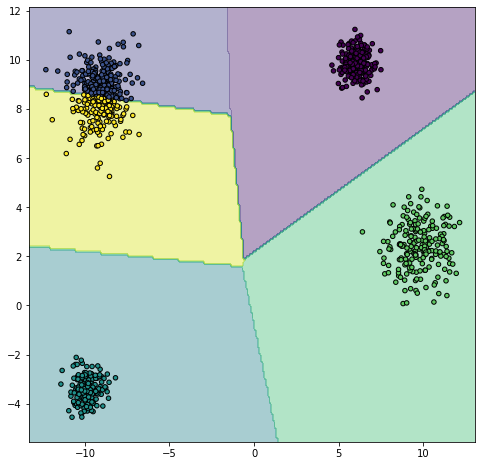

In [11]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
plt.show()

In [12]:
# distance from each instance to every centroid
kmeans.transform(X_new)

array([[ 9.90939362, 11.51986923, 11.27101519,  9.78486957, 10.82335731],
       [ 8.41489507, 13.99281071, 13.97586981,  6.78853177, 13.45504752],
       [11.35374089,  8.61815833,  9.41219246, 12.79054506,  7.7901096 ],
       [11.66167091,  8.98300271,  9.07843591, 12.7769563 ,  8.10671422]])

In [13]:
# when you know where the centroids are
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init=1)

#### Accelerated K-Means anda Mini-Batch K-Means

In [14]:
from sklearn.cluster import MiniBatchKMeans

In [15]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [16]:
#performance measure
from sklearn.metrics import silhouette_score
silhouette_score(X, minibatch_kmeans.labels_)

0.7810247391008456

In [17]:
scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
    del(kmeans)

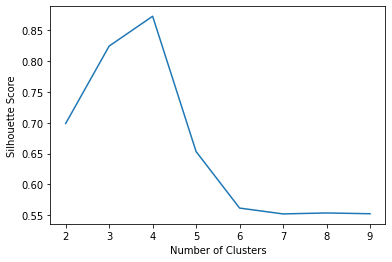

In [18]:
plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show() #five cluster is the best choice

### Using Clustering for Image Segmentation

In [19]:
from matplotlib.image import imread
import os

In [20]:
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))

In [21]:
image.shape

(533, 800, 3)

In [22]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [23]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

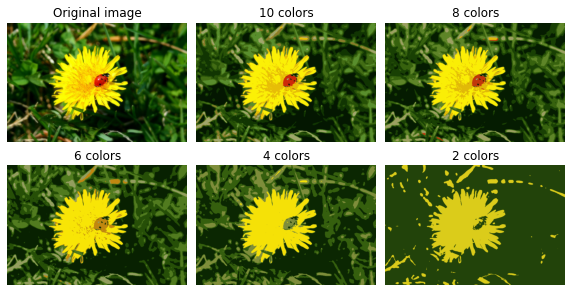

In [25]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
plt.show()

### Clustering for Preprocessing
- dimensionality reduction

In [26]:
from sklearn.datasets import load_digits

In [27]:
X_digits, y_digits = load_digits(return_X_y= True)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [29]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
log_reg.score(X_test, y_test)

0.96

In [31]:
# adding a preprocessing step(clustering)
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression(solver='liblinear', multi_class='auto'))
])

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [33]:
pipeline.score(X_test, y_test)

0.9822222222222222

We can use GridSearchCV to find the optimal number of clusters based on the final scoring by Logistic Regression

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_dict = dict(kmeans__n_clusters=range(50,125))

In [36]:
grid_clf = GridSearchCV(pipeline, param_dict, cv=3, verbose=2)

In [37]:
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END ..............................kmeans__n_clusters=50; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=50; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=50; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=51; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=51; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=51; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=52; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=52; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=52; total time=   0.4s
[CV] END ..............................kmeans__n_clusters=53; total time=   0.3s
[CV] END ..............................kmeans__n_clusters=53; total time=   0.3s
[CV] END ..............................kmeans__

[CV] END ..............................kmeans__n_clusters=83; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=84; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=84; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=84; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=85; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=85; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=85; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=86; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=86; total time=   0.8s
[CV] END ..............................kmeans__n_clusters=86; total time=   0.9s
[CV] END ..............................kmeans__n_clusters=87; total time=   0.7s
[CV] END ..............................kmeans__n_clusters=87; total time=   0.7s
[CV] END ...................

[CV] END .............................kmeans__n_clusters=117; total time=   1.0s
[CV] END .............................kmeans__n_clusters=118; total time=   1.0s
[CV] END .............................kmeans__n_clusters=118; total time=   1.1s
[CV] END .............................kmeans__n_clusters=118; total time=   1.0s
[CV] END .............................kmeans__n_clusters=119; total time=   1.0s
[CV] END .............................kmeans__n_clusters=119; total time=   1.2s
[CV] END .............................kmeans__n_clusters=119; total time=   1.0s
[CV] END .............................kmeans__n_clusters=120; total time=   1.1s
[CV] END .............................kmeans__n_clusters=120; total time=   0.9s
[CV] END .............................kmeans__n_clusters=120; total time=   1.0s
[CV] END .............................kmeans__n_clusters=121; total time=   1.0s
[CV] END .............................kmeans__n_clusters=121; total time=   1.0s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'kmeans__n_clusters': range(50, 125)}, verbose=2)

In [38]:
grid_clf.best_params_

{'kmeans__n_clusters': 86}

In [39]:
grid_clf.score(X_test, y_test)

0.9866666666666667

### Clustering for Semi-Supervised Learning

In [40]:
n_labeled = 50

In [41]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

In [42]:
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(solver='liblinear')

In [43]:
log_reg.score(X_test, y_test)

0.7444444444444445

In [44]:
# cluster the training setinto 50 cluster (one image per cluster)
k = 50
kmeans = KMeans(n_clusters=k)

X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [45]:
#manually labeling the instances 
y_representative_digits = y_train[representative_digit_idx].copy()

In [46]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

In [47]:
log_reg.fit(X_representative_digits, y_representative_digits)

LogisticRegression(solver='liblinear')

In [48]:
log_reg.score(X_test, y_test)

0.9155555555555556

Label Propagation

In [49]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

In [50]:
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [51]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

In [52]:
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(solver='liblinear')

In [53]:
log_reg.score(X_test, y_test)

0.9444444444444444

 - only propagate the labels to the 20% of the instances that are closest to the centroids

In [54]:
percentile_closest = 20.
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [55]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [56]:
partially_propagated = (X_cluster_dist != -1)

In [57]:
X_train_partially_propagated = X_train[partially_propagated]

In [58]:
y_train_partially_propagated = y_train[partially_propagated]

In [59]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')

In [60]:
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(solver='liblinear')

In [61]:
log_reg.score(X_test, y_test)

0.9288888888888889

## DBSCAN

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise= 0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)

In [64]:
dbscan.fit(X)

DBSCAN(eps=0.05)

In [65]:
dbscan.labels_

array([ 0,  1,  2,  3,  4,  0,  5,  1,  7,  4, -1,  3,  5,  0,  5,  0,  0,
        4, -1,  0,  6,  1,  4,  0,  0,  6,  3,  4,  0,  0,  5,  3,  3,  5,
        5,  7,  4,  0,  5,  0,  1,  5,  0,  1,  0,  6,  0,  6, -1,  0,  0,
        0,  0,  4,  4,  6,  0,  4,  1,  0,  4,  4, -1,  7,  0,  8,  1,  0,
        1,  5,  0,  5,  3,  4,  5,  7,  6,  4,  6,  6,  7,  0,  7,  0,  5,
       -1,  6,  0,  0,  4,  0,  0,  4,  4, -1,  4, -1,  6,  4, -1,  4,  4,
        1,  0, -1,  5,  0,  7,  1, -1,  4, -1,  7,  6, -1,  1,  0,  0,  3,
       -1, -1,  4,  0,  5,  1,  0,  0,  0, -1,  0,  0,  0,  3, -1,  1,  5,
        5,  4,  0,  4,  4,  5,  0,  1,  0,  1,  6,  1,  0,  0,  5,  4,  0,
        5,  1,  4,  5,  3,  0,  0,  2,  0,  0,  7,  1,  0,  4,  4,  4,  1,
        5,  0,  5,  0,  3,  4,  4,  4,  5,  6,  5, -1,  0,  4, -1,  8,  4,
        4,  4,  0,  0,  4,  0,  1,  6,  1,  6,  0, -1,  5,  0,  6, -1, -1,
        0,  4,  1,  4,  4,  0,  0,  0,  0,  8,  3,  0,  4,  7,  4,  4,  0,
       -1,  3,  0,  1,  4

In [68]:
len(dbscan.core_sample_indices_)

782

In [70]:
# actual core instances coords
dbscan.components_

array([[-0.98155609,  0.46899757],
       [ 0.04393871,  0.31018779],
       [-0.62693723,  0.63742056],
       ...,
       [ 0.25628491, -0.18924883],
       [ 0.06161587,  0.20238659],
       [ 1.7409532 , -0.18931799]])

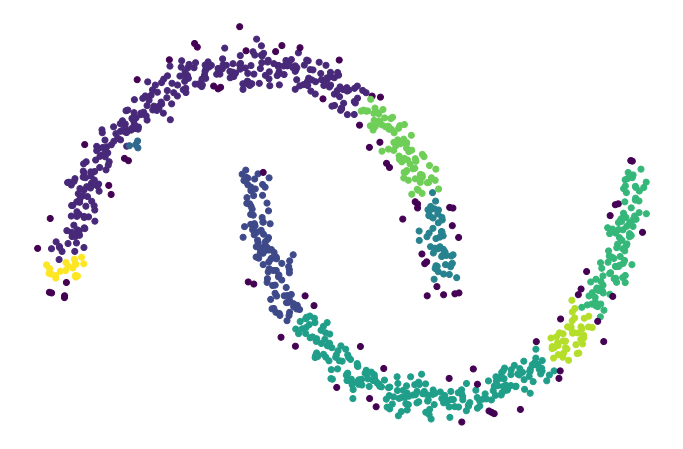

In [71]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.axis('off')
plt.show()

In [72]:
# increasing epsilon
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

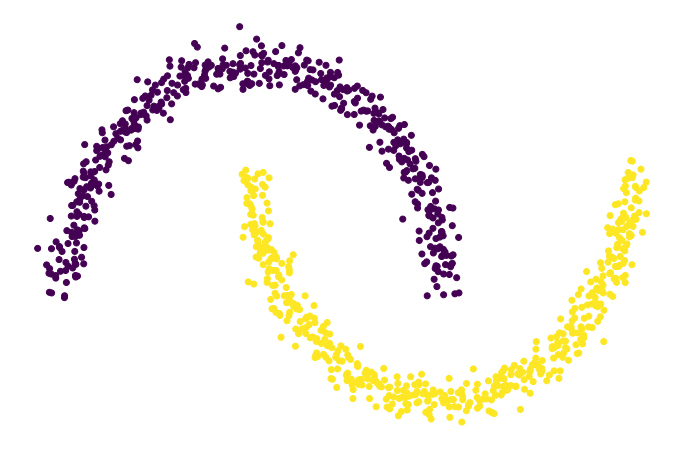

In [73]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.axis('off')
plt.show()

In [74]:
#implementing a predict() method
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [75]:
X_new = np.array([[-0.5, 0.], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1], dtype=int64)

In [76]:
knn.predict_proba(X_new)

array([[0.88, 0.12],
       [0.  , 1.  ],
       [0.84, 0.16],
       [0.  , 1.  ]])

In [77]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1], dtype=int64)